# Hurricane/Not-Hurricane Classifier using GPU virt_env

## KERAS Basic Sequential Model

In [1]:
#!pip3 install opencv-python
#!pip3 install numpy
#!pip3 install pandas
#!pip3 install keras
#!pip3 install opencv-python
#!pip3 install matplotlib
#!pip3 install pytest

import pytest
import os
import h5py
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.callbacks import ModelCheckpoint

#h5py.run_tests()

In [2]:
keras.backend.clear_session()

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

valid_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'C:/Users/donneb/Documents/DataAnalytics/hurricane_not_hurricane/train',
        target_size=(299, 299),
        batch_size=32,
        class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(
        'C:/Users/donneb/Documents/DataAnalytics/hurricane_not_hurricane/validate',
        target_size=(299, 299),
        batch_size=4, #consider making 5 in future as mult of 25
        class_mode='binary')


test_generator = test_datagen.flow_from_directory(
        'C:/Users/donneb/Documents/DataAnalytics/hurricane_not_hurricane/test',
        target_size=(299, 299),
        batch_size=32,
        class_mode='binary')

Found 102 images belonging to 2 classes.
Found 25 images belonging to 2 classes.
Found 129 images belonging to 2 classes.


In [4]:
#print(train_generator.class_indices)
#print(valid_generator.class_indices)
#print(test_generator.class_indices)

In [5]:
train_steps = train_generator.n // train_generator.batch_size
valid_steps = valid_generator.n // valid_generator.batch_size
test_steps = test_generator.n // test_generator.batch_size

checkpointer = ModelCheckpoint(filepath='/donneb/Documents/DataAnalytics/weights.hdf5',monitor= 'val_acc', verbose=1, save_best_only=True)

'''
checkpointer = ModelCheckpoint(
    filepath = '/donneb/Documents/DataAnalytics/weights.hdf5', monitor='val_accuracy',
    verbose=0, save_best_only=False,
    save_weights_only=False, mode='auto', save_freq='epoch',
    options=None
)
'''

"\ncheckpointer = ModelCheckpoint(\n    filepath = '/donneb/Documents/DataAnalytics/weights.hdf5', monitor='val_accuracy',\n    verbose=0, save_best_only=False,\n    save_weights_only=False, mode='auto', save_freq='epoch',\n    options=None\n)\n"

** Defining and Training the Model

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 3), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 299, 299, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 299, 299, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 99, 99, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 99, 99, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0

In [8]:
#from keras.optimizers import Adam
#opt = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [9]:
history = model.fit(
        train_generator,
        steps_per_epoch=train_steps,
        validation_data= valid_generator,
        validation_steps=valid_steps,
        epochs=50,
        verbose=1,
        callbacks=[checkpointer])

Epoch 1/50
3/3 [==============================] - 11s 4s/step - loss: 4.9336 - binary_accuracy: 0.6857 - val_loss: 0.8059 - val_binary_accuracy: 0.8333
Epoch 2/50
3/3 [==============================] - 9s 3s/step - loss: 0.9420 - binary_accuracy: 0.7286 - val_loss: 0.7929 - val_binary_accuracy: 0.1667
Epoch 3/50
3/3 [==============================] - 8s 3s/step - loss: 0.8057 - binary_accuracy: 0.4000 - val_loss: 0.6253 - val_binary_accuracy: 0.8333
Epoch 4/50
3/3 [==============================] - 8s 3s/step - loss: 0.5963 - binary_accuracy: 0.8429 - val_loss: 0.4373 - val_binary_accuracy: 0.8750
Epoch 5/50
3/3 [==============================] - 13s 4s/step - loss: 0.5676 - binary_accuracy: 0.7812 - val_loss: 0.5389 - val_binary_accuracy: 0.8333
Epoch 6/50
3/3 [==============================] - 13s 4s/step - loss: 0.4913 - binary_accuracy: 0.8429 - val_loss: 0.5336 - val_binary_accuracy: 0.8333
Epoch 7/50
3/3 [==============================] - 15s 5s/step - loss: 0.5736 - binary_accur

In [10]:
#model.load_weights('/donneb/Documents/DataAnalytics/weeights.hdf5')

## Metrics Acc and Loss for train/validation

In [11]:
model.evaluate(test_generator, verbose=1, steps=test_steps)

4/4 [==============================] - 29s 7s/step - loss: 0.4782 - binary_accuracy: 0.7422


[0.47815990447998047, 0.7421875]

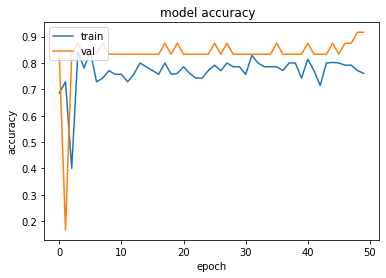

In [12]:
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'] )
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy  ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

#heavily utilized resource: https://github.com/J-Yash/Hotdog-Not-Hotdog/blob/master/Basic_hotdog_classifier.ipynb

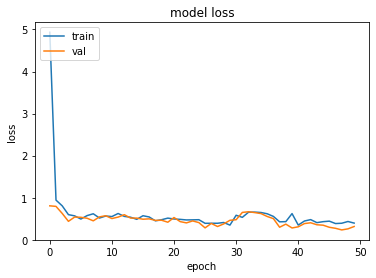

In [13]:
# summarize history for loss
plt.plot(history.history['loss'] )
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Pytorch Model

In [14]:
#!pip install torch===1.7.0 torchvision===0.8.1 torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html
#!pip install tensorflow
#!pip install keras
#!pip install seaborn
#!pip install tqdm
#!pip install sklearn


%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

#pytorch imports
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils, datasets
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler


#tensorflow imports
import PIL
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.metrics import classification_report, confusion_matrix

In [15]:
#set the random seed
np.random.seed(0)
torch.manual_seed(0)

sns.set_style('darkgrid')
#following https://towardsdatascience.com/pytorch-vision-binary-image-classification-d9a227705cf9

In [16]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device_id = torch.cuda.device_count() 
#device = torch.cuda.get_device_name(range(device_id)
#device
root_dir = "C:/Users/donneb/Documents/DataAnalytics/hurricane_not_hurricane_original/hurricane_not_hurricane/"

In [17]:
#PIL to numpy array
image_transforms = {
    "train": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ]),
    "test": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ]),
}

In [18]:
hurricane_dataset = datasets.ImageFolder(root = root_dir + "train",transform = image_transforms["train"])
hurricane_dataset

hurricane_dataset_test = datasets.ImageFolder(root = root_dir + "test",transform = image_transforms["test"])
hurricane_dataset_test

Dataset ImageFolder
    Number of datapoints: 129
    Root location: C:/Users/donneb/Documents/DataAnalytics/hurricane_not_hurricane_original/hurricane_not_hurricane/test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )

In [19]:
hurricane_dataset.class_to_idx
idx2class = {v: k for k, v in hurricane_dataset.class_to_idx.items()}

Text(0.5, 1.0, 'Entire Dataset (before train/val/test split)')

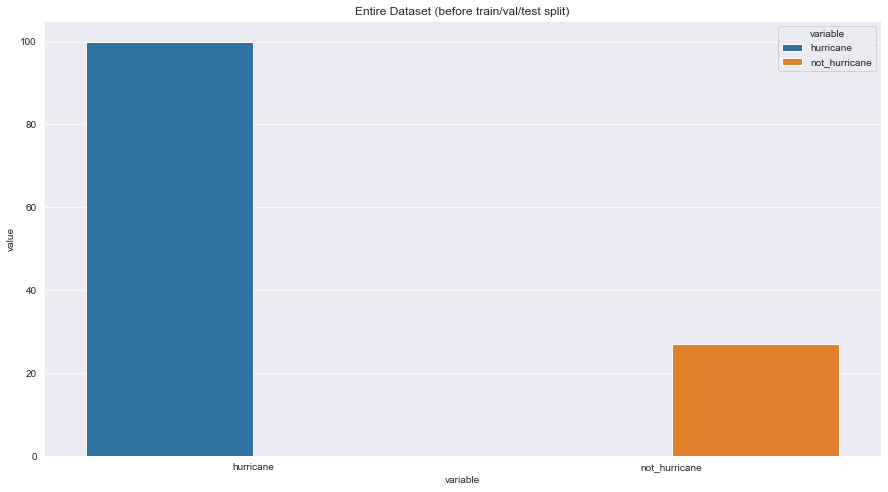

In [20]:
def get_class_distribution(dataset_obj):
    count_dict = {k:0 for k,v in dataset_obj.class_to_idx.items()}   
    
    for _, label_id in dataset_obj:
        label = idx2class[label_id]
        count_dict[label] += 1
    return count_dict

def plot_from_dict(dict_obj, plot_title, **kwargs):
    return sns.barplot(data =
pd.DataFrame.from_dict([dict_obj]).melt(), x = "variable",
y="value", hue="variable", **kwargs).set_title(plot_title)

plt.figure(figsize=(15,8))
plot_from_dict(get_class_distribution(hurricane_dataset),
plot_title ="Entire Dataset (before train/val/test split)")

In [21]:
#creating list of indices 0 to len of dataset
hurricane_dataset_size = len(hurricane_dataset)
hurricane_dataset_indices = list(range(hurricane_dataset_size))

In [22]:
#shuffle list of indices
np.random.shuffle(hurricane_dataset_indices)

#create split index 0.2% of dataset size
val_split_index = int(np.floor(0.2 * hurricane_dataset_size))

#slice list for 2 test,train indices (train,val)
train_idx, val_idx = hurricane_dataset_indices[val_split_index:],hurricane_dataset_indices[:val_split_index]

In [23]:
#create samplers
train_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(val_idx)

In [24]:
#Test, Validation, and Test Data Loader
train_loader = DataLoader(dataset=hurricane_dataset, shuffle=False,
                          batch_size=32, sampler=train_sampler)

val_loader = DataLoader(dataset=hurricane_dataset, shuffle=False,
                        batch_size=5, sampler=val_sampler)

test_loader = DataLoader(dataset=hurricane_dataset_test, shuffle=False,
                         batch_size=1)# had to heavily change batch size to get functionality, particularly in val

In [25]:
def get_class_distribution_loaders(dataloader_obj, dataset_obj):
    count_dict = {k:0 for k,v in dataset_obj.class_to_idx.items()}    
    
    if dataloader_obj.batch_size == 1:    
        for _,label_id in dataloader_obj:
            y_idx = label_id.item()
            y_lbl = idx2class[y_idx]
            count_dict[str(y_lbl)] += 1
    else: 
        for _,label_id in dataloader_obj:
            for idx in label_id:
                y_idx = idx.item()
                y_lbl = idx2class[y_idx]
                count_dict[str(y_lbl)] += 1
    return count_dict

Text(0.5, 1.0, 'Val Set')

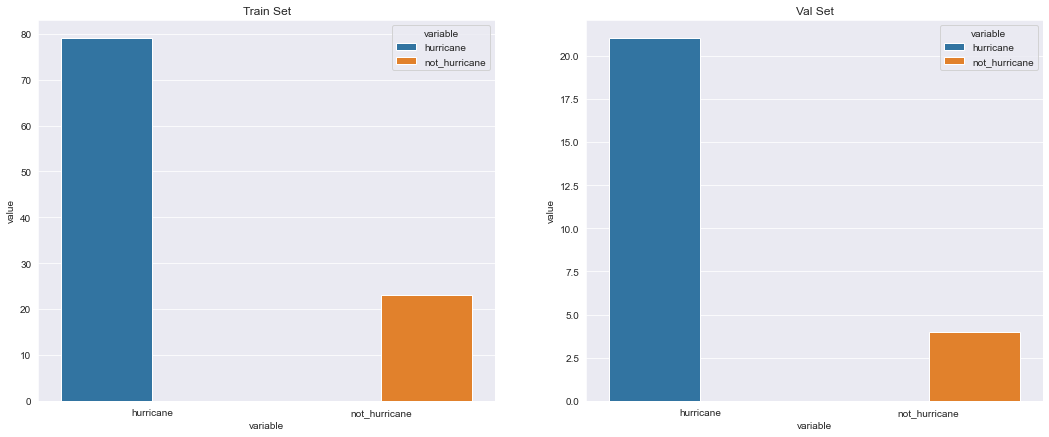

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,7))

plot_from_dict(get_class_distribution_loaders(train_loader,
    hurricane_dataset), plot_title="Train Set", ax=axes[0])

plot_from_dict(get_class_distribution_loaders(val_loader,
    hurricane_dataset), plot_title="Val Set", ax=axes[1])

In [27]:
single_batch = next(iter(train_loader))
single_batch[0].shape

torch.Size([32, 3, 224, 224])

In [28]:
print("Output label tensors: ", single_batch[1])
print("\nOutput label tensor shape: ", single_batch[1].shape)

Output label tensors:  tensor([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0])

Output label tensor shape:  torch.Size([32])


In [29]:
# Selecting the first image tensor from the batch. 
single_image = single_batch[0][0]
single_image.shape

torch.Size([3, 224, 224])

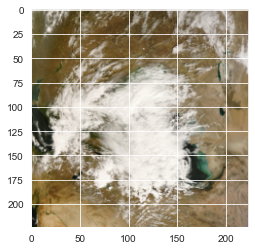

In [30]:
plt.imshow(single_image.permute(1, 2, 0))

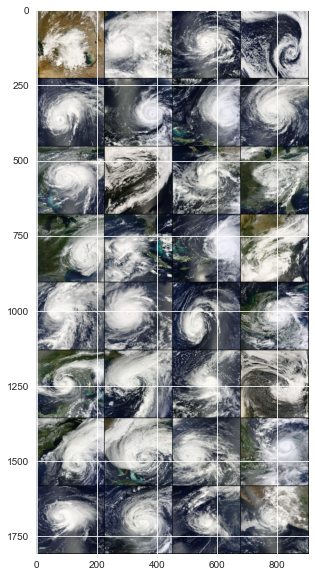

In [31]:
# We do single_batch[0] because each batch is a list 
# where the 0th index is the image tensor and 1st index is the output label.
single_batch_grid = utils.make_grid(single_batch[0], nrow=4)

plt.figure(figsize = (10,10))
plt.imshow(single_batch_grid.permute(1, 2, 0))

### Defining CNN Architecture

In [32]:
class HurricaneClassifier(nn.Module):
    def __init__(self):
        super(HurricaneClassifier, self).__init__()
        
        self.block1 = self.conv_block(c_in=3, c_out=256,dropout=0.1, kernel_size=5, stride=1, padding=2)
        self.block2 = self.conv_block(c_in=256, c_out=128, dropout=0.1, kernel_size=3, stride=1, padding=1)
        self.block3 = self.conv_block(c_in=128, c_out=64, dropout=0.1, kernel_size=3, stride=1, padding=1)
        self.lastcnn = nn.Conv2d(in_channels=64, out_channels=2, kernel_size=56, stride=1, padding=0)        
        
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        
    def forward(self, x):
        x = self.block1(x)
        x = self.maxpool(x) 
        
        x = self.block2(x)
        
        x = self.block3(x)
        x = self.maxpool(x)
        
        x = self.lastcnn(x)
        
        return x
    
    def conv_block(self, c_in, c_out, dropout,  **kwargs):
        seq_block = nn.Sequential(
            nn.Conv2d(in_channels=c_in, out_channels=c_out, **kwargs),
            nn.BatchNorm2d(num_features=c_out),
            nn.ReLU(),
            nn.Dropout2d(p=dropout)
        )        
        
        return seq_block

In [33]:
model2 = HurricaneClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=0.008)

In [34]:
## EXAMPLE TRYING TO MAKE SENSE OF CROSS ENTROPY LOSS
input = torch.randn(3, 5, requires_grad=True)
print(input)
target = torch.empty(3, dtype=torch.long).random_(5)
print(target)
output = criterion(input, target)
print(output)
output.backward()
print(output)

tensor([[ 0.3762,  0.2444,  0.4127, -1.7156, -1.5393],
        [ 0.1202,  0.1128, -1.6079, -0.5939, -1.4583],
        [ 0.5048, -1.4646,  1.4345, -0.7654,  0.4624]], requires_grad=True)
tensor([1, 4, 0])
tensor(1.8378, grad_fn=<NllLossBackward>)
tensor(1.8378, grad_fn=<NllLossBackward>)


### Binary Accuracy per Epoch Function

In [35]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_tag, dim = 1)
    
    correct_results_sum = (y_pred_tags == y_test).sum().float()
    
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)    
    
    return acc

accuracy_stats = {
    'train': [],
    "val": []
}

loss_stats = {
    'train': [],
    "val": []
}

In [36]:
print("Begin training.")

for e in tqdm(range(1, 21)):
    
    # TRAINING    
    train_epoch_loss = 0
    train_epoch_acc = 0  
    
    model2.train()
    for X_train_batch, y_train_batch in train_loader:
        #X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        #y_train_pred0 = model2(X_train_batch)
        #y_train_pred = np.squeeze(model2(X_train_batch))
        y_train_pred = model2(X_train_batch).squeeze()
        
        
        #BREAKS HERE TENSOR MATCH ISSUE w/ CRITERION 
        print("TRAIN")
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = binary_acc(y_train_pred, y_train_batch)#change to pred0 if fails
        
        train_loss.backward()
        optimizer.step()        
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
    # VALIDATION
    with torch.no_grad():
        model2.eval()
        val_epoch_loss = 0
        val_epoch_acc = 0
        for X_val_batch, y_val_batch in val_loader:
            #X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)            
            
            optimizer.zero_grad()
            y_val_pred = model2(X_val_batch).squeeze()       
            
            #BREAKS HERE TENSOR MATCH ISSUE w/ CRITERION 
            print("VALIDATION")
            
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = binary_acc(y_val_pred, y_val_batch)            
            
            val_epoch_loss += train_loss.item()
            val_epoch_acc += train_acc.item()    
            
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
    
    print(f'Epoch {e+0:02}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')
  

Begin training.


TRAIN
TRAIN
TRAIN
TRAIN
VALIDATION
VALIDATION
VALIDATION
VALIDATION
VALIDATION
Epoch 01: | Train Loss: 162.10297 | Val Loss: 229.49339 | Train Acc: 68.750| Val Acc: 50.000
TRAIN
TRAIN
TRAIN
TRAIN
VALIDATION
VALIDATION
VALIDATION
VALIDATION
VALIDATION
Epoch 02: | Train Loss: 47.99048 | Val Loss: 28.11575 | Train Acc: 71.750| Val Acc: 83.000
TRAIN
TRAIN
TRAIN
TRAIN
VALIDATION
VALIDATION
VALIDATION
VALIDATION
VALIDATION
Epoch 03: | Train Loss: 31.07047 | Val Loss: 19.92136 | Train Acc: 88.750| Val Acc: 83.000
TRAIN
TRAIN
TRAIN
TRAIN
VALIDATION
VALIDATION
VALIDATION
VALIDATION
VALIDATION
Epoch 04: | Train Loss: 16.61698 | Val Loss: 0.00000 | Train Acc: 91.500| Val Acc: 100.000
TRAIN
TRAIN
TRAIN
TRAIN
VALIDATION
VALIDATION
VALIDATION
VALIDATION
VALIDATION
Epoch 05: | Train Loss: 14.98996 | Val Loss: 0.00000 | Train Acc: 95.500| Val Acc: 100.000
TRAIN
TRAIN
TRAIN
TRAIN
VALIDATION
VALIDATION
VALIDATION
VALIDATION
VALIDATION
Epoch 06: | Train Loss: 29.68433 | Val Loss: 112.88177 | Train Acc: 9

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

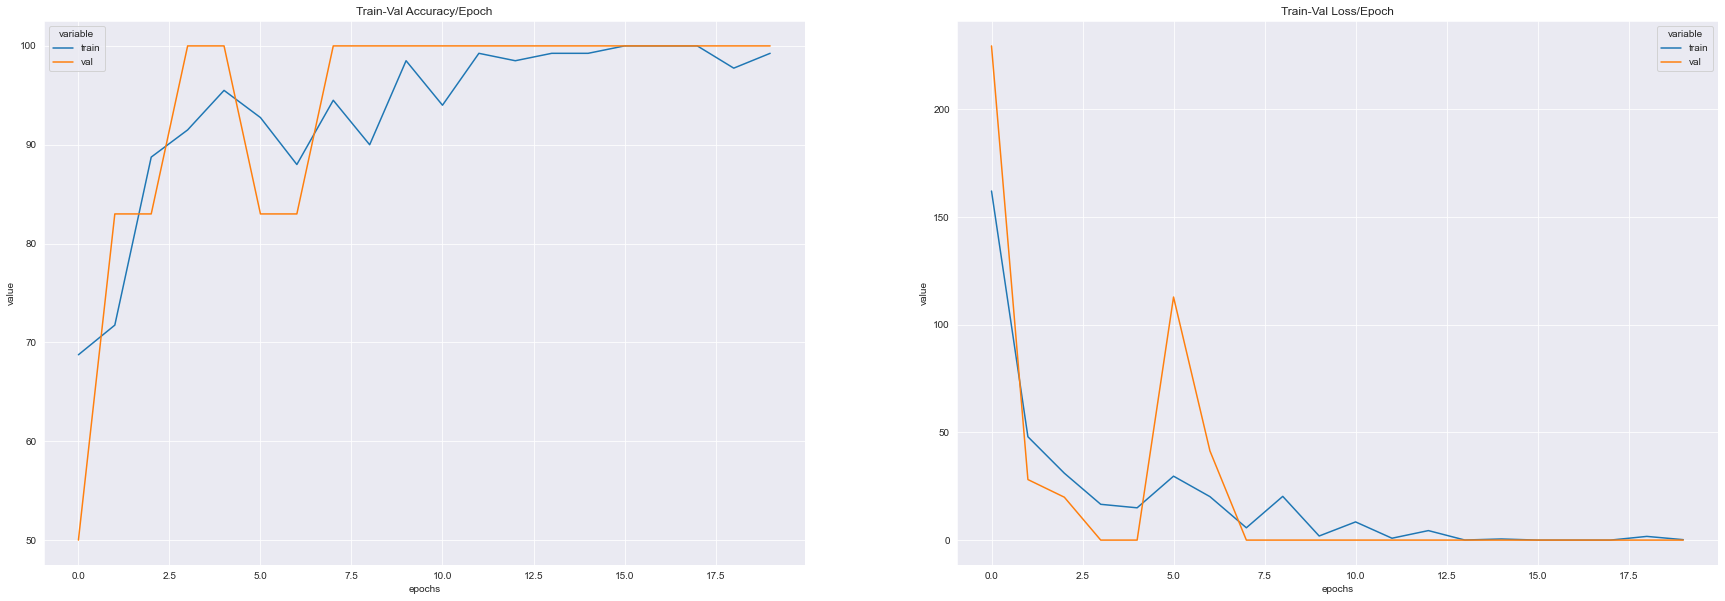

In [38]:
#Visualizing loss and acc
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,10))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value",
    hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')

sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", 
    hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

In [39]:
y_pred_list = []
y_true_list = []
with torch.no_grad():
    for x_batch, y_batch in tqdm(test_loader):
        
        y_test_pred = model2(x_batch)
        
        y_test_pred = torch.log_softmax(y_test_pred, dim=1)
        _, y_pred_tag = torch.max(y_test_pred, dim = 1)
        
        y_pred_list.append(y_pred_tag.cpu().numpy())
        y_true_list.append(y_batch.cpu().numpy())
        
y_pred_list = [i[0][0][0] for i in y_pred_list]
y_true_list = [i[0] for i in y_true_list]

In [40]:
print(classification_report(y_true_list, y_pred_list))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       102
           1       0.62      0.37      0.47        27

    accuracy                           0.82       129
   macro avg       0.74      0.66      0.68       129
weighted avg       0.80      0.82      0.80       129



In [41]:
print(confusion_matrix(y_true_list, y_pred_list))

[[96  6]
 [17 10]]


<AxesSubplot:>

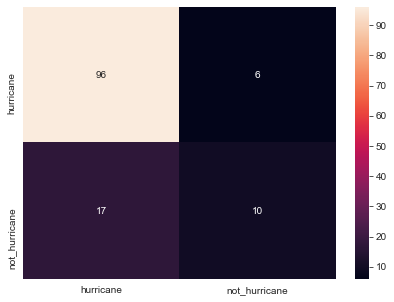

In [42]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_true_list, y_pred_list)).rename(columns=idx2class, index=idx2class)

fig, ax = plt.subplots(figsize=(7,5))         
sns.heatmap(confusion_matrix_df, annot=True, ax=ax)